<a href="https://colab.research.google.com/github/BastianSiahaan/Project/blob/main/Project_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Our project is an analysis of a dataset about avocados from Kaggle. With the data available in the dataset, our research question is:

# ***Can we predict the average retail price using seasonal trends, product type, and regional characteristics?***

# ***CONTEXT***

Avocado prices are variable and can change a lot depending on the region, time of year, and type(organic or conventional). These changes can affect many different parties such as grocery stores, farmers, and distributors who need to decide how much to sell, where to ship, and what price to charge.

This analysis uses avocado sales data from 2015 to 2017, collected across US cities. We grouped the data by month to look at general trends instead of small and potentially volatile weekly changes. Our goal is to build a model and analysis that can answer our research question.

# ***ANALYSIS***

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
df = pd.read_csv("avocado.csv")

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [18]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Year,Type_Binary
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,2015,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,2015,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,2015,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,2015,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,2015,0


In [20]:
df['Type_Binary'] = (df['type'] == 'organic').astype(int)

df_monthly = df.groupby(['Year', 'Month', 'region', 'Type_Binary'], as_index=False)['AveragePrice'].mean()
df_monthly['Time'] = pd.to_datetime(df_monthly['Year'].astype(str) + '-' + df_monthly['Month'].astype(str) + '-01')

<ipython-input-21-c242521ffd71>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type_Binary', y='AveragePrice', data=df_monthly, palette='Set2')


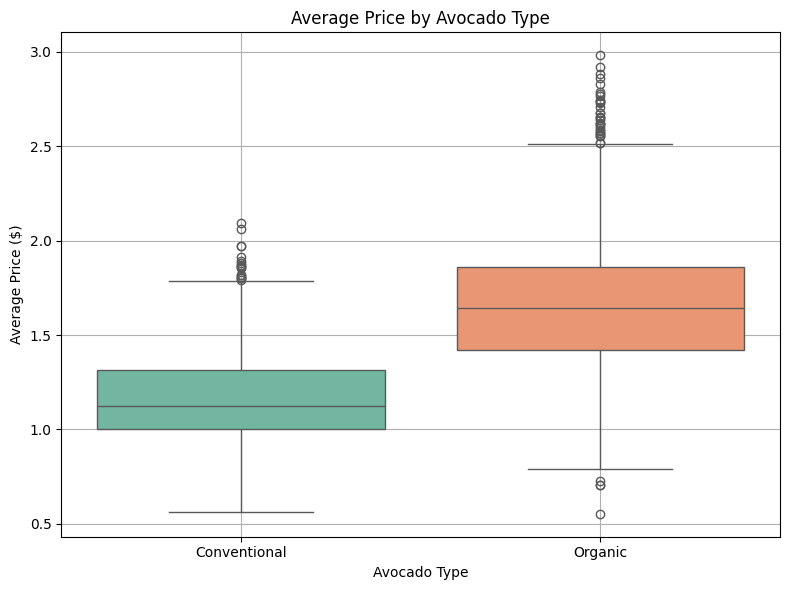

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type_Binary', y='AveragePrice', data=df_monthly, palette='Set2')
plt.xticks([0, 1], ['Conventional', 'Organic'])
plt.title("Average Price by Avocado Type")
plt.xlabel("Avocado Type")
plt.ylabel("Average Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

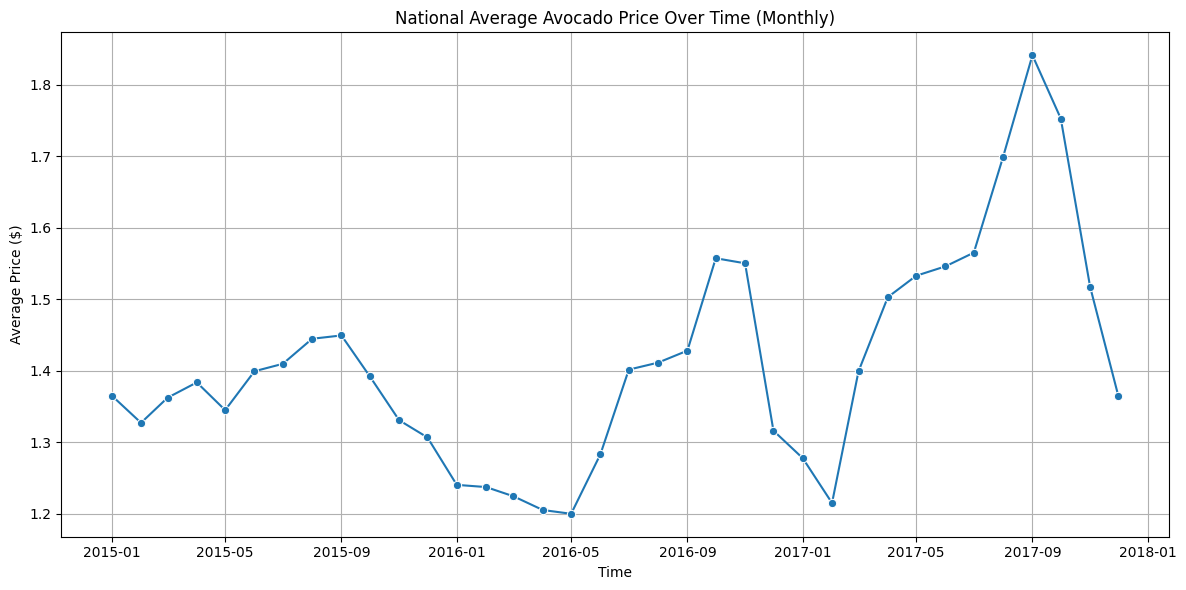

In [22]:
monthly_avg = df_monthly.groupby(['Time'])['AveragePrice'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='Time', y='AveragePrice', marker='o')
plt.title("National Average Avocado Price Over Time (Monthly)")
plt.xlabel("Time")
plt.ylabel("Average Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
X_cat = pd.get_dummies(df_monthly[['region', 'Month']], drop_first=True)
X_num = df_monthly[['Type_Binary']]
X = pd.concat([X_num, X_cat], axis=1)
X = X.astype(float)
X = sm.add_constant(X)
y = df_monthly['AveragePrice'].astype(float)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     117.6
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:01:54   Log-Likelihood:                 51.153
No. Observations:                3888   AIC:                             9.694
Df Residuals:                    3832   BIC:                             360.6
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# ***RESULTS***

Our analysis focused on understanding how well avocado prices can be predicted using product type, seasonal trends, and regional characteristics. We used three key outputs to answer our research question: two plots and one regression model.

For Plot 1, we found that organic avocados are consistently more expensive than conventional ones. The boxplot showed a clear price difference, with organic avocados typically costing about $0.50 more. This supports the idea that product type is a meaningful predictor in our model.

For Plot 2, when we looked at price trends over time (averaged across all U.S. regions), we saw a clear seasonal pattern. Prices tend to increase around mid-year (May–August) and dip during the winter months. This pattern repeats over the years and justifies using month as a predictor to capture seasonality.

For our final analysis, we ran a multiple linear regression using region, month, and type as predictors. The model achieved an R-squared of 0.628, meaning it explains about 63% of the variation in avocado prices. This suggests that even with just a few variables, we can build a model that captures most of the key pricing patterns. Furthermore, specific numbers in the regression analysis show that the coefficent for Type_Binary(organic) was around 0.5, confirming that organic avocados are priced higher. Finally, month dummy variables helped capture seasonal trends, and regional dummies showed that some cities consistently have higher prices.

Together, these results show that product type, season, and region are strong predictors of avocado prices. While there are certainly other factors we didn’t include (like weather or transportation costs), our simple model still performs well and gives useful insights.

# ***CONCLUSION***

In this project, we set out to predict the average retail price of avocados using just three types of information: product type, region, and time of year. After visualizing the data and building a regression model, we found that these simple features explain about 63% of the variation in prices.

Our results showed that:



*   Organic avocados are consistently more expensive than conventional ones.
*   Prices vary across regions, with some cities like New York and San Francisco having higher baseline prices.
*   Seasonal trends matter, as prices tend to rise in the summer and fall in the winter.

Even though we didn’t include external factors like weather, trade policies, or supply disruptions, our model still performed well. This suggests that much of the variation in avocado pricing can be predicted using just historical sales data.

Overall, our model could be useful for businesses looking to forecast prices or plan sales strategies, and it provides a solid foundation for more advanced forecasting tools.